Notebook used during development

Make sure the venv is on the path (we could [create a kernel](https://medium.com/@eleroy/jupyter-notebook-in-a-virtual-environment-virtualenv-8f3c3448247) but this approach avoids creating hundreds of kernels)

In [1]:
pwd

'/Users/robincole/Documents/Github/hello-websocket/development'

In [2]:
import sys
import os

In [3]:
current_dir = os.path.dirname(os.getcwd())
venv_path = '/venv/lib/python3.6/site-packages'
venv_dir = current_dir + venv_path
print(venv_dir)

/Users/robincole/Documents/Github/hello-websocket/venv/lib/python3.6/site-packages


In [4]:
sys.path.insert(0, venv_dir)

In [5]:
sys.path[0]

'/Users/robincole/Documents/Github/hello-websocket/venv/lib/python3.6/site-packages'

In [6]:
import io
from PIL import Image
import time
import re

import coils
import cv2
import numpy as np
import redis

import base64
from io import BytesIO

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display # to display images

Open the camera on 0 using [cv2.VideoCapture](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html)

In [7]:
VIDEO_SOURCE = 0
cap = cv2.VideoCapture(VIDEO_SOURCE)
cap.isOpened()

True

Lets capture a frame which is returned as a numpy array

In [8]:
_, np_array = cap.read()

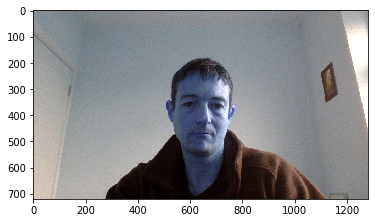

In [9]:
plt.imshow(np_array);

The colours look incorrect because openCV uses BGR but we can set to RGB

In [10]:
imgRGB=cv2.cvtColor(np_array,cv2.COLOR_BGR2RGB)

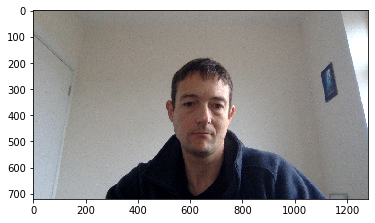

In [11]:
plt.imshow(imgRGB);

We want a byte string for storing in redis, we use PIL for that -> https://pillow.readthedocs.io/en/stable/

In [12]:
image = Image.fromarray(imgRGB)

In [13]:
image.width

1280

In [14]:
image.height

720

In [15]:
image_size = image.size
image_size

(1280, 720)

PIL provides handy methods for manipulating the image

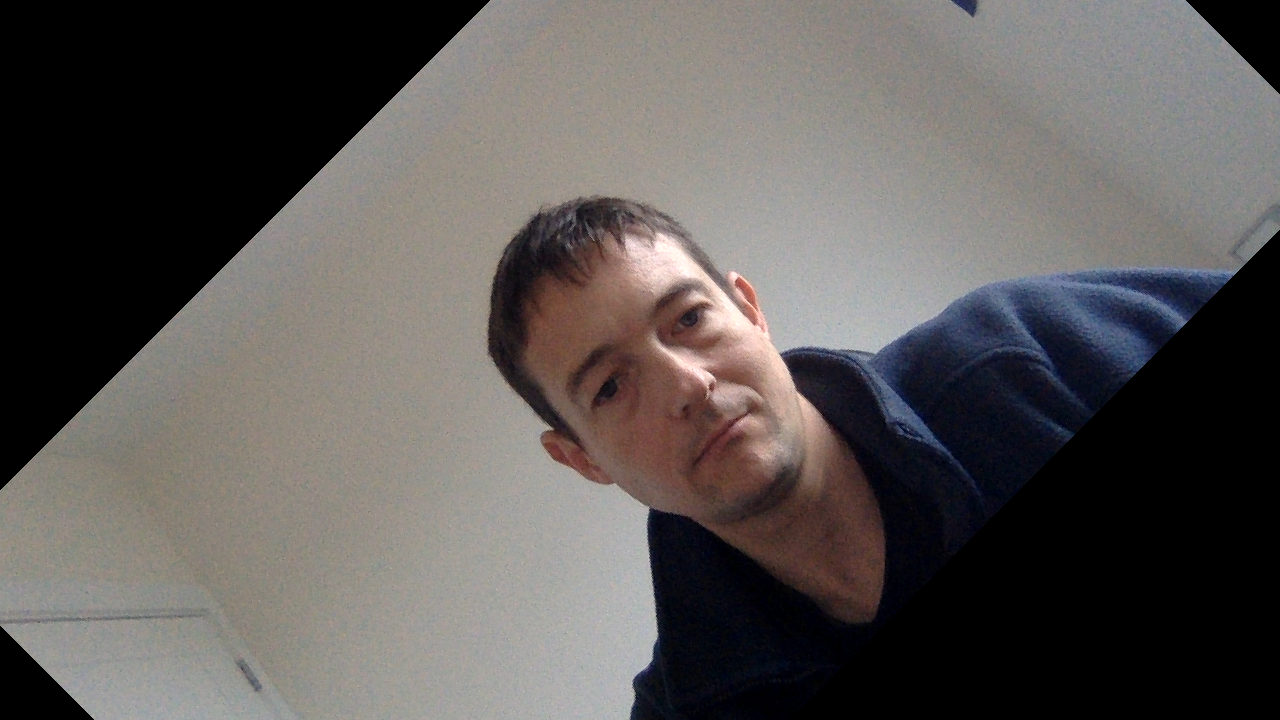

In [16]:
display(image.rotate(45))

Convert to base64 encoded string for storing

In [17]:
img_bytes = image.tobytes()

In [18]:
image_str = base64.b64encode(img_bytes)

In [19]:
image_str[:50]

b'kY2Ajot+lJGEmZWIkY2EkY2EjYl/jYl/j4l/j4l/mJOEmJOEm5'

Now decode

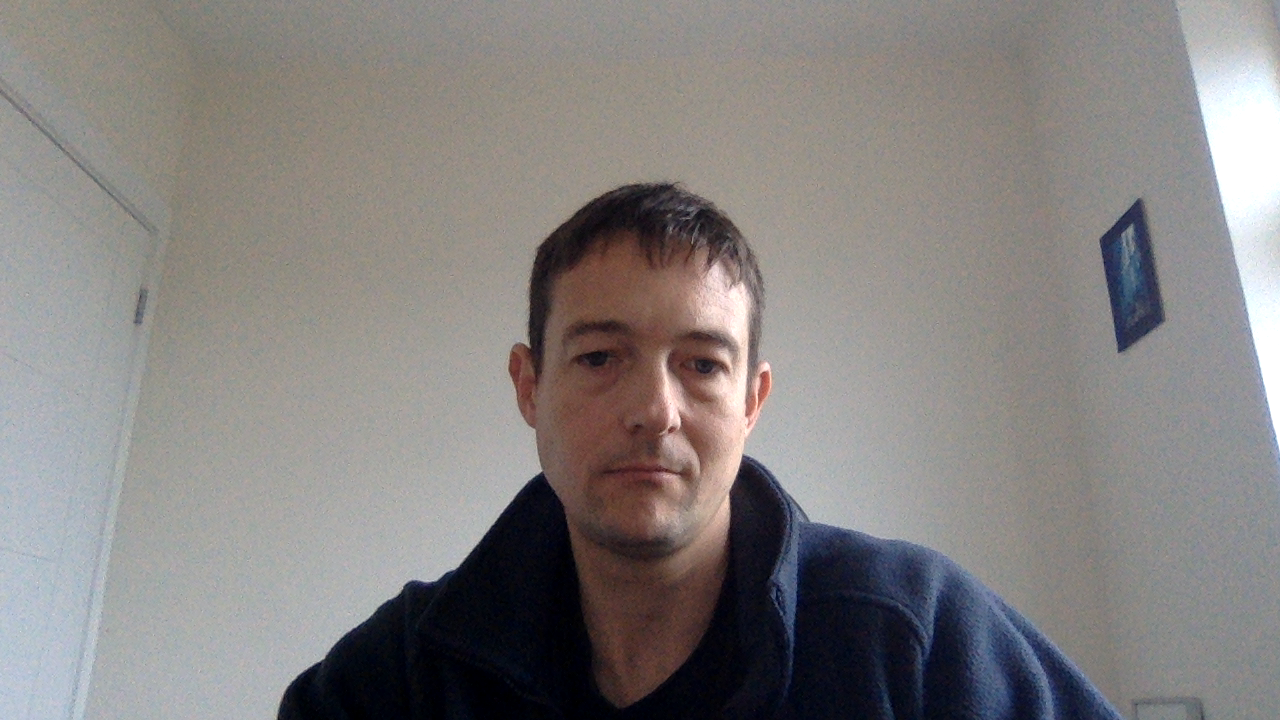

In [20]:
Image.frombytes('RGB', image_size, base64.b64decode(image_str))

In [21]:
# When everything done, release the capture
cap.release()

## Redis
Use Redis to cache image data

In [22]:
store = redis.Redis()

In [23]:
store.set('image_str', image_str)

image_id = os.urandom(4) # used to check that a new frame is available in Redis
store.set('image_id', image_id)

True

In [24]:
store.get('image_id')

b'\x8c\x86\x8b\xc1'

In [25]:
store.get('image_str')[:50]

b'kY2Ajot+lJGEmZWIkY2EkY2EjYl/jYl/j4l/j4l/mJOEmJOEm5'

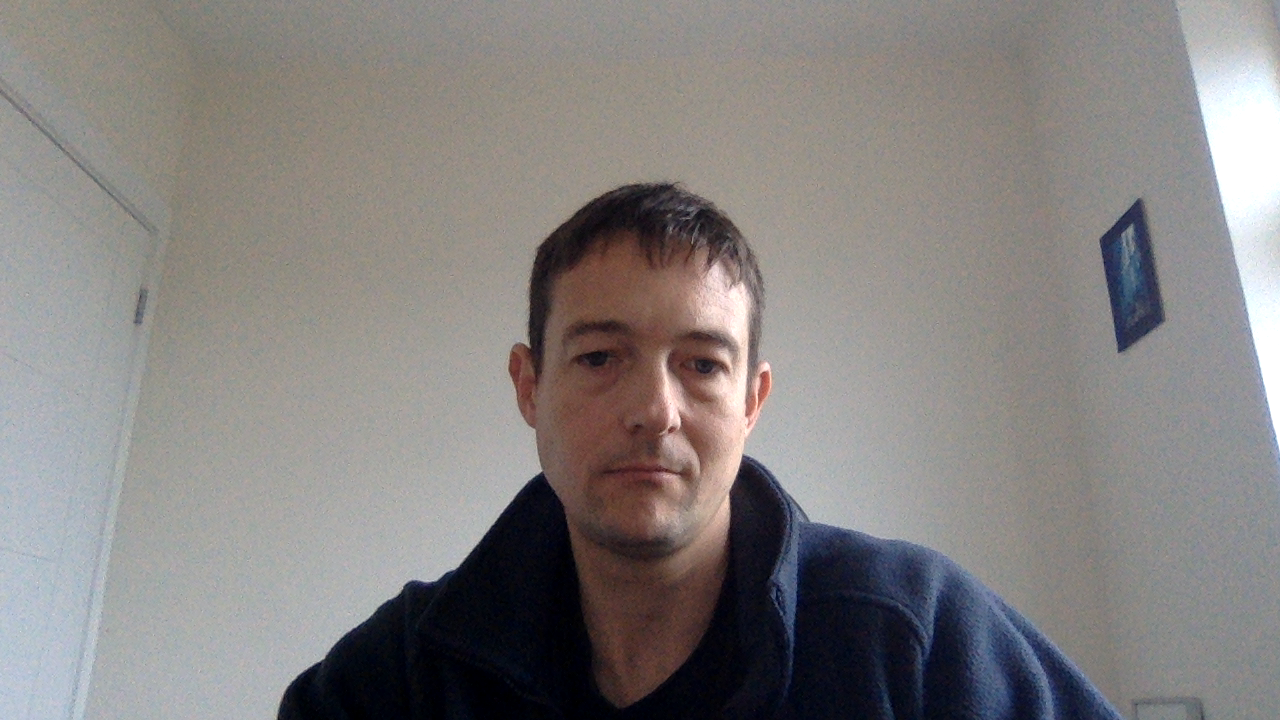

In [26]:
Image.frombytes('RGB', image_size, base64.b64decode(store.get('image_str')))